In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("email_spams.csv")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
print("missing values :")
df.isnull().sum()

missing values :


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [9]:
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [10]:
df['label'] = df['label'].map({'ham': 'safe', 'spam': 'spam'})

In [13]:
print("Class distribution:\n", df['label'].value_counts())

Class distribution:
 label
safe    4825
spam     747
Name: count, dtype: int64


In [14]:
# adding message length (characters) and word count
df['char_count'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Compare spam vs safe in terms of message size
print(df.groupby('label')[['char_count', 'word_count']].mean())


       char_count  word_count
label                        
safe    71.023627   14.200622
spam   138.866131   23.851406


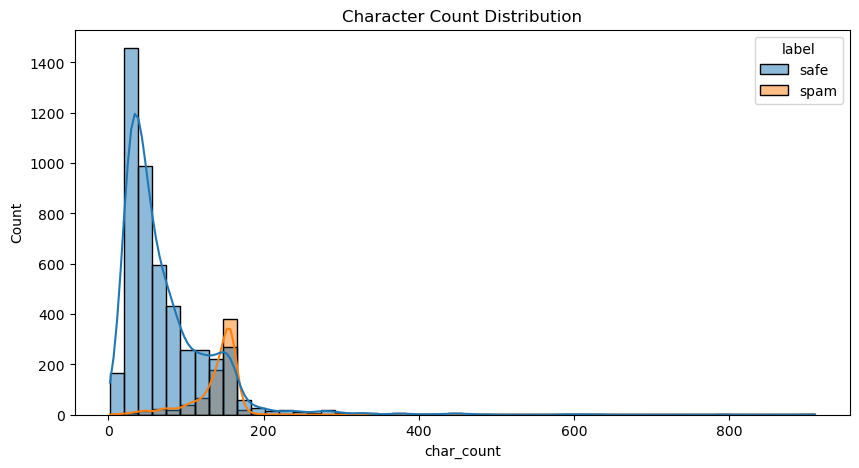

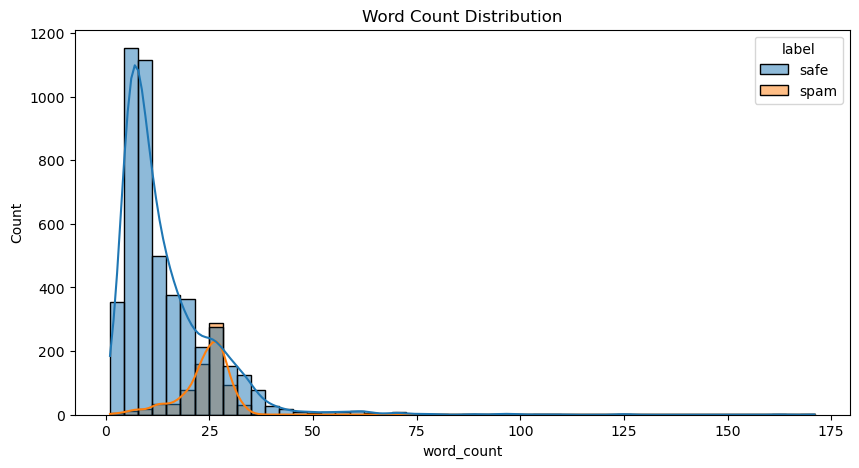

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Character count distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='char_count', hue='label', bins=50, kde=True)
plt.title("Character Count Distribution")
plt.show()

# Word count distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True)
plt.title("Word Count Distribution")
plt.show()


In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()                                                                                    #tolowercase
    text = re.sub(r'[^a-z\s]', '', text)                                                                  # removing punctuation and numbers
    words = text.split()                                                                                 #Tokenize words  
    words = [word for word in words if word not in stop_words]                                          # remove stopwords
    words = [stemmer.stem(word) for word in words]                                                     #stemming
    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:

df['cleaned'] = df['message'].apply(preprocess)


print(df[['message', 'cleaned']].head(10))


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                             cleaned  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  
5  freemsg hey darl week word back id like fun st... 

In [18]:

df.to_csv("email_spam_cleaned.csv", index=False)
